# HANDLING OUTLIERS

In [36]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [93]:
marks = [23,34,56,34,76,34,25,56,54,75,80,85,73,45,65,78,34,23,67]

## FIVE NUMBERS

In [96]:
minimum,q1,median,q3,maximum = np.quantile(marks,[0,0.25,0.50,0.75,1.0])

In [98]:
minimum,q1,median,q3,maximum

(23.0, 34.0, 56.0, 74.0, 85.0)

In [108]:
#computing IQR 
iqr = q3-q1


lower_fence = q1-1.5*(iqr)
heigher_fence = q3+1.5*(iqr)

heigher_fence

134.0

In [102]:
iqr

40.0

<Axes: >

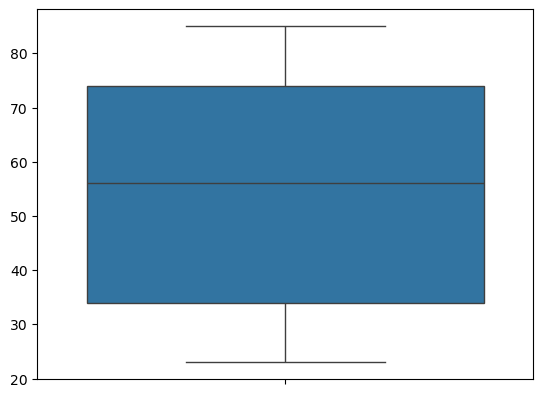

In [104]:
sns.boxplot(marks)

<Axes: >

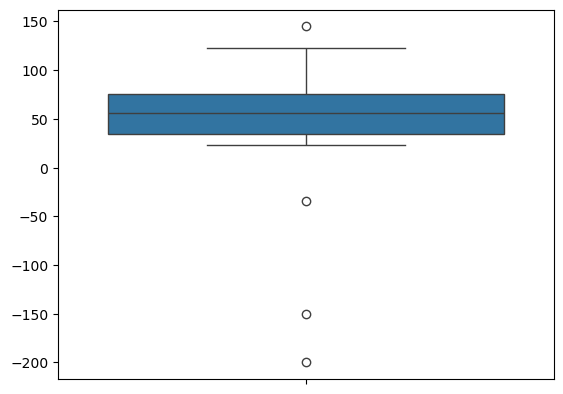

In [116]:
marks = [-200,-150,-34,23,34,56,34,76,34,25,56,54,75,80,85,73,45,65,78,34,23,67,112,123,145]
sns.boxplot(marks)

## 3-SIGMA TECHNIQUE (STANADERD DEVIATION)

In [125]:
#satyaith patnaik

In [129]:
df = pd.read_csv('practice_outliers_dataset.csv')
df

,Age,Salary,WorkingHours
0,39.967142,33015.551095,41.788937
1,33.617357,44952.256127,42.803923
2,41.476885,45887.425802,45.415256
3,50.230299,40372.672769,45.269010
4,32.658466,48064.571460,33.111653
...,...,...,...
99,32.654129,36284.356426,43.148144
100,120.000000,150000.000000,80.000000
101,5.000000,200000.000000,1.000000
102,100.000000,10.000000,100.000000


In [131]:
#defining a function

def find_outlier(data):
    #definig a list for outlier data
    outlier = []
    
    #define sd and mean  
    s_d = np.std(data)
    mean_ = np.mean(data)

    #define a end peirod 
    period = s_d*3

    #defining two limits 
    lower_limit = mean_-period
    upper_limit =  mean_+period
    for outliers in data:
        if outliers > upper_limit or outliers < lower_limit:
            outlier.append(outliers)
    return outlier



    


In [170]:
list = find_outlier(df['Salary'])

In [172]:
len(list)

2

In [174]:
#about whether this column is skwed or not 
df.WorkingHours.skew()

1.2632040512706875

<Axes: xlabel='Salary', ylabel='Density'>

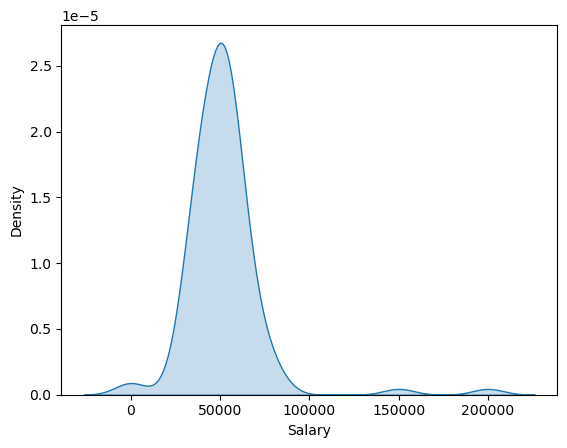

In [176]:
sns.kdeplot(df['Salary'], fill = True)

## REMOVING OUTLIER 

we use np.log() way

In [196]:
df['transformation1'] = np.log(df.Salary)
df.transformation1.skew()

-6.451710774405211

<Axes: ylabel='transformation1'>

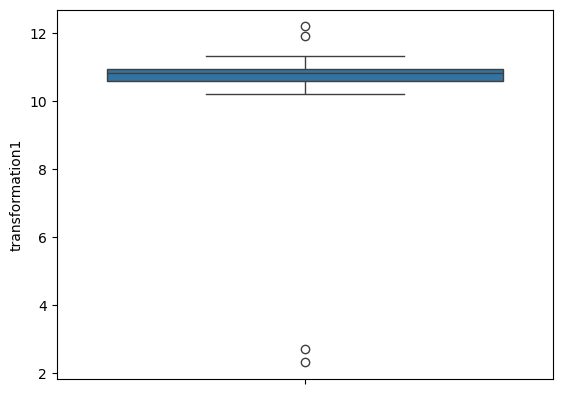

In [198]:
sns.boxplot(df['transformation1'])

<Axes: xlabel='transformation1', ylabel='Density'>

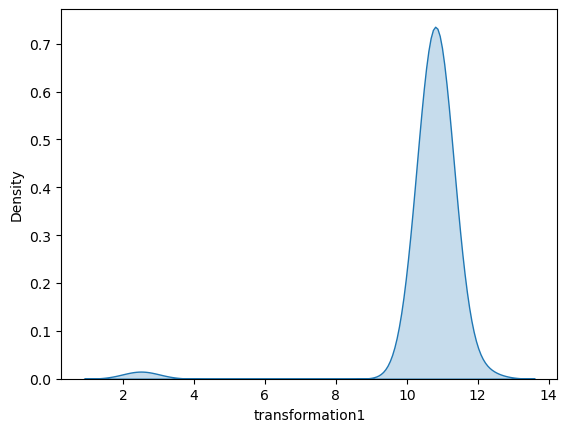

In [200]:
sns.kdeplot(df['transformation1'], fill = True)

In [206]:
# double log transformation ## data sett aaayitt varnilaaa outlier povnilaa
df['transformation2'] = np.log(df.transformation1)
df.transformation2.skew()

-6.956237066579151

<Axes: ylabel='transformation2'>

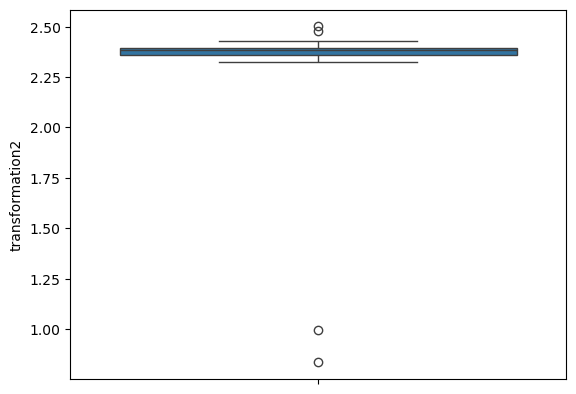

In [208]:
sns.boxplot(df['transformation2'])